**Ciencia y analítica de datos**

Carlos Álvarez

Ejemplo básico de Ingeniería de características (Feature Engineering)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Ciencia y Analitica de Datos_TC4029.11/Modulo 3/Actividad 6.0"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df.head(20)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [6]:
cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], inplace=True)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
cars_df_metadata_dict = {
    "number_of_rows": cars_df.shape[0],
    "number_of_columns": cars_df.shape[1],
    "numeric_cols_names": [col  for col in cars_df.columns if cars_df[col].dtype in ['int64', 'float64']],
    "non_numeric_cols_names": [col  for col in cars_df.columns if cars_df[col].dtype not in ['int64', 'float64']],
}

In [8]:
print("""
      El dataset de autos usados vendidos en USA cuenta con {:,} renglones.

      Además, cuenta con:

            * COLUMNAS: {}
            * TOTAL DE COLUMNAS: {:,}

      De las cuales:

            * COLUMNAS NÚMERICAS: {}
            * COLUMNAS NÚMERICAS #: {:,}

            * COLUMNAS NO NÚMERICAS: {}
            * COLUMNAS NO NÚMERICAS #: {:,}

      """.format(
          cars_df_metadata_dict["number_of_rows"],
          list(cars_df.columns),
          len(cars_df.columns),
          cars_df_metadata_dict["numeric_cols_names"],
          len(cars_df_metadata_dict["numeric_cols_names"]),
          cars_df_metadata_dict["non_numeric_cols_names"],
          len(cars_df_metadata_dict["non_numeric_cols_names"]),
          )
)


      El dataset de autos usados vendidos en USA cuenta con 426,880 renglones.

      Además, cuenta con:

            * COLUMNAS: ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'county', 'state']
            * TOTAL DE COLUMNAS: 18

      De las cuales:

            * COLUMNAS NÚMERICAS: ['price', 'year', 'odometer', 'county']
            * COLUMNAS NÚMERICAS #: 4

            * COLUMNAS NO NÚMERICAS: ['region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
            * COLUMNAS NO NÚMERICAS #: 14

      


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


RESPUESTA:

* Se eliminaron 6 columnas del dataset.

In [9]:
# Calculamos el % de valores nulos por columna
nulls_df = pd.DataFrame((cars_df.isna().sum() / cars_df.shape[0]) * 100, columns=["Porcentaje de Valores Faltantes"])
nulls_df = nulls_df.join(pd.DataFrame(cars_df.isna().sum(), columns=["Cantidad de Valores Faltantes"]))
nulls_df.sort_values(by=["Porcentaje de Valores Faltantes"], ascending=False, inplace=True)
nulls_df

,Porcentaje de Valores Faltantes,Cantidad de Valores Faltantes
county,100.000000,426880
size,71.767476,306361
cylinders,41.622470,177678
condition,40.785232,174104
drive,30.586347,130567
paint_color,30.501078,130203
type,21.752717,92858
manufacturer,4.133714,17646
title_status,1.930753,8242
model,1.236179,5277


In [10]:
# Eliminamos los valores faltantes a partir del umbral establecido
# Para ellos usaremos el parametro thresh del método "dropna"
# El parametro thresh recibe un número entero como valor
# e indica el número de valores NO Null con los que debe contar la columna para poder ser conservada
# Es por ello que:
# Al total de renglones del datase le restamos el número máximo de renglones Null
# del subconjunto de columnas que tiene valores null menor a 30 %
not_na_values_threshold = cars_df_metadata_dict["number_of_rows"] - nulls_df[nulls_df["Porcentaje de Valores Faltantes"]<30]["Cantidad de Valores Faltantes"].max()
not_na_values_threshold

334022

In [11]:
# Una vez definido el umbral entonces procedemos a la eliminación de las columnas
cars_df.dropna(axis=1, thresh=not_na_values_threshold, inplace=True)

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?

**RESPUESTA:**

* Se eliminó el 8.73% de los registros.

In [12]:
# Extraemos la lista de columnas que cuentan con menos del 5% de valores faltantes
cols_to_dropna = list(nulls_df[(nulls_df["Porcentaje de Valores Faltantes"]<5) & (nulls_df["Porcentaje de Valores Faltantes"]>0)].index)
cols_to_dropna

['manufacturer',
 'title_status',
 'model',
 'odometer',
 'fuel',
 'transmission',
 'year']

In [13]:
# Eliminamos los registros de la tabla que cuentan con valores nulos
# pero solo en las columnas de la lista cols_to_dropna
cars_df.dropna(subset=cols_to_dropna, inplace=True)

In [14]:
# Calculamos el porcentaje de valores eliminados respecto al dataset original
"{:,.2f}%".format((1 - (cars_df.shape[0] / cars_df_metadata_dict["number_of_rows"])) * 100)

'8.73%'

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)


**RESPUESTA:**

* De acuerdo con los precedentes de esta actividad: *Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.* Entonces:
    * La única variable que aún cuenta con valores faltantes es la variable "type".
    * La variable "type", es del tipo categórica.
    * Debemos imputar con la moda de la variable.

In [15]:
nulls_df = pd.DataFrame((cars_df.isna().sum() / cars_df.shape[0]) * 100, columns=["Porcentaje de Valores Faltantes"]).sort_values(by=["Porcentaje de Valores Faltantes"], ascending=False)
nulls_df[nulls_df["Porcentaje de Valores Faltantes"] > 0]

,Porcentaje de Valores Faltantes
type,21.208201


Text(0.5, 1.0, "Gráfico de barras para la variable 'type'")

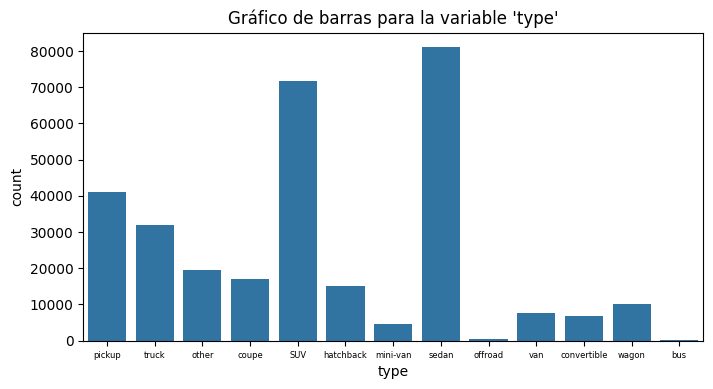

In [16]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=cars_df, x="type")
ax.tick_params(axis='x', labelsize=6)
ax.set_title("Gráfico de barras para la variable 'type'")

In [17]:
#descripcion antes de imputacion
cars_df.describe(include=['object'])

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,389604,389604,389604,389604,389604,389604,389604,306976,389604
unique,404,413,41,21866,5,6,3,13,51
top,columbus,https://reno.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3334,2852,67811,7786,329679,377138,309260,80976,45131


In [18]:
# Imputamos usando la moda
cars_df.fillna({"type": cars_df["type"].mode()[0]}, inplace=True)

In [19]:
#descripcion despues de imputacion
cars_df.describe(include=['object'])

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,389604,389604,389604,389604,389604,389604,389604,389604,389604
unique,404,413,41,21866,5,6,3,13,51
top,columbus,https://reno.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3334,2852,67811,7786,329679,377138,309260,163604,45131


In [20]:
#Se compruba no existan valores faltantes en ninguna columna
porcentaje_faltantes = cars_df.apply(lambda col: (col.isna().sum() / cars_df.shape[0]) * 100)
print(porcentaje_faltantes)

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

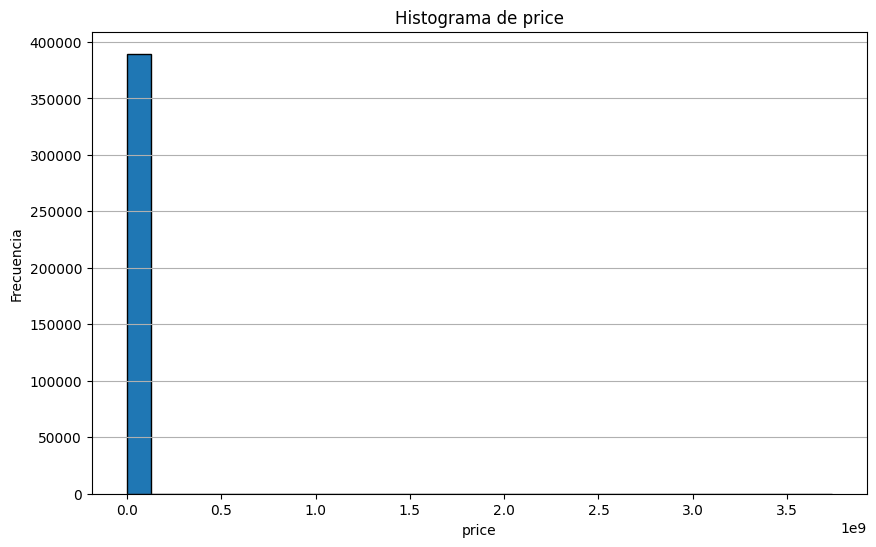

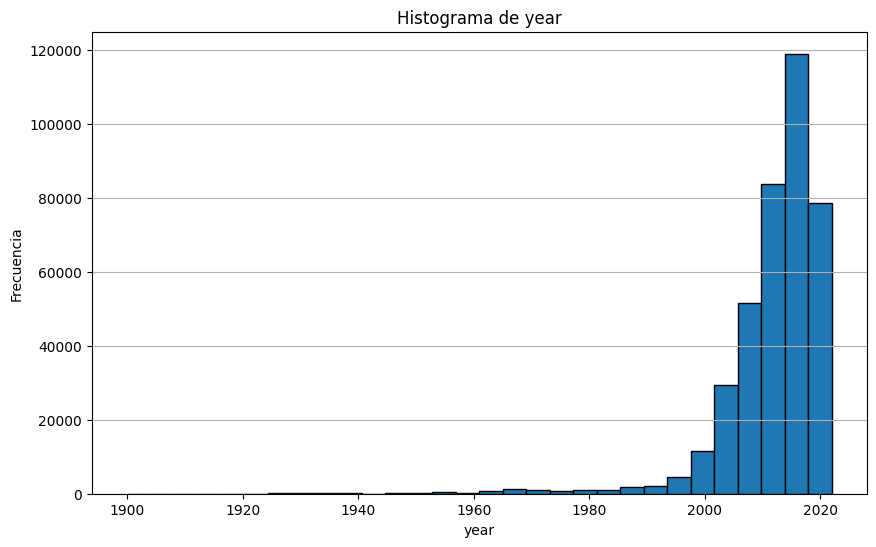

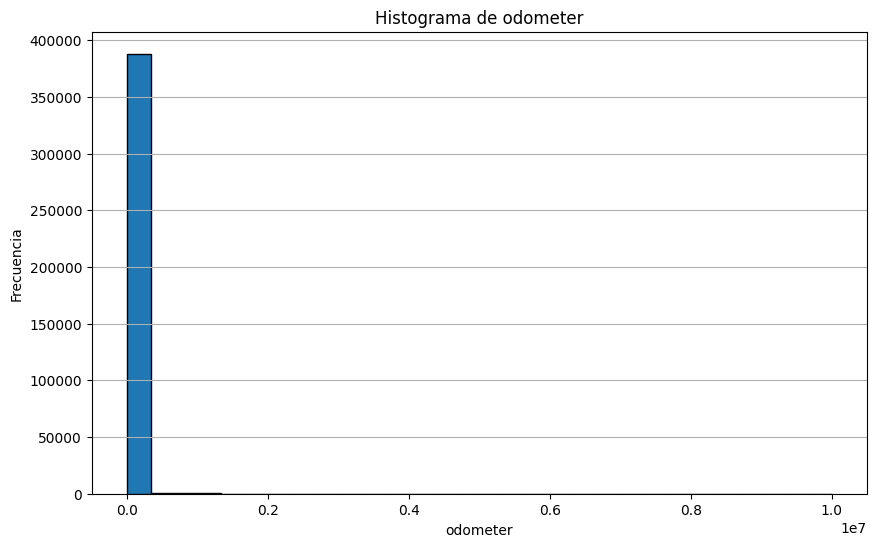

In [21]:
# Obtener histogramas de las variables price, year y odometer
variables = ['price', 'year', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    cars_df[variable].plot(kind='hist', bins=30, edgecolor='k')
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [22]:
import datetime as dt

In [23]:
# Calculamos el año actual
today_year = dt.datetime.today().date().year

In [24]:
# Calculamos la nueva columna "Age"
cars_df["age"] = today_year - cars_df["year"]

In [25]:
# Eliminamos la columna year
cars_df.drop(columns=["year"], inplace=True)

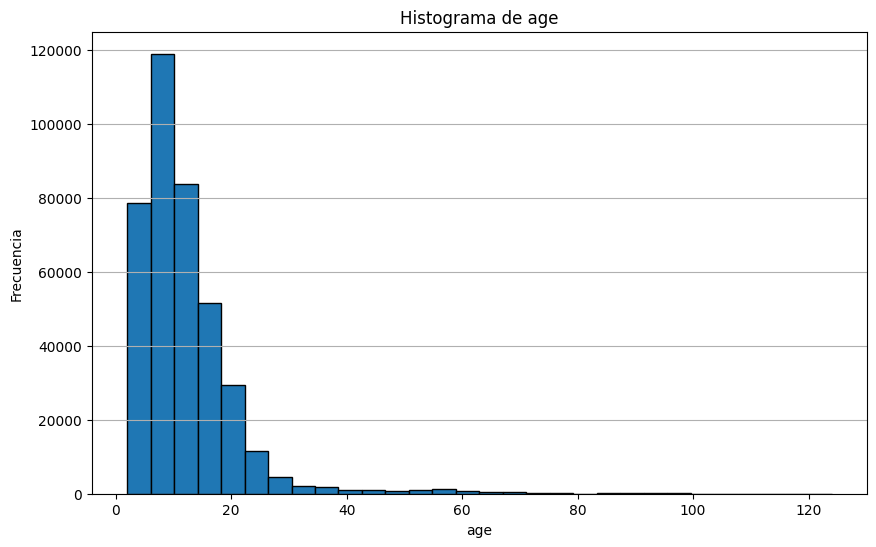

In [26]:
# Generar el histograma de la nueva variable age
plt.figure(figsize=(10, 6))
cars_df['age'].plot(kind='hist', bins=30, edgecolor='k')
plt.title('Histograma de age')
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

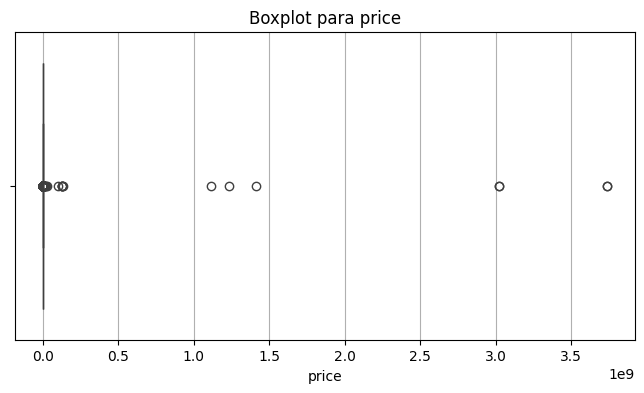

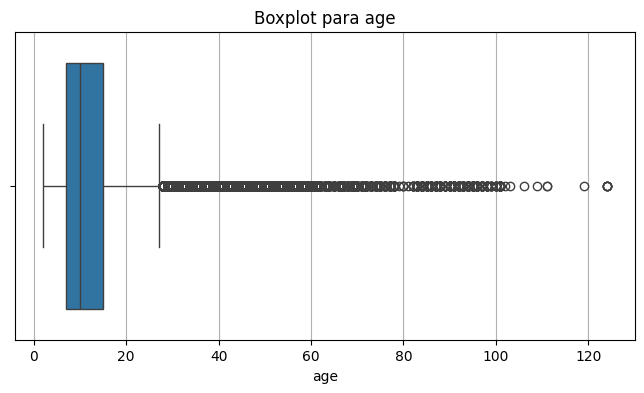

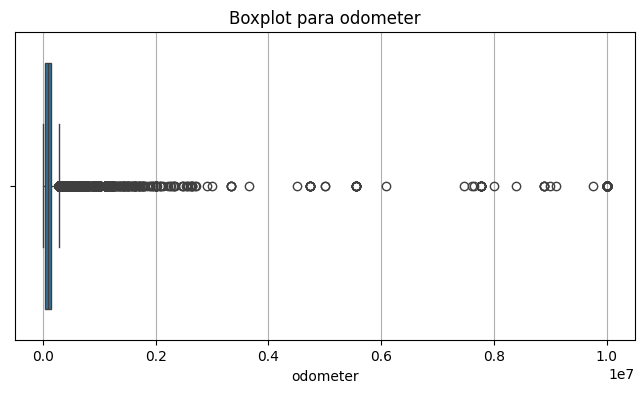

In [27]:
for var_ in ["price", "age", "odometer"]:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=cars_df, x=var_)
    plt.title(f'Boxplot para {var_}')
    plt.grid(axis="x")
    plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [28]:
all_variables_iqr_outliers_data_dict = {}
for var_ in ["price", "age", "odometer"]:
    # Definimos un diccionario auxiliar que nos ayudará
    # a guardar la información de IQR de la variable "var_"
    aux_dict = {}

    # Calculamos los datos necesarios para aplicar el método IQR
    aux_dict["percentile_25"] = cars_df[var_].quantile(0.25)
    aux_dict["percentile_75"] = cars_df[var_].quantile(0.75)
    aux_dict["iqr"] = aux_dict["percentile_75"] - aux_dict["percentile_25"]
    aux_dict["upper_limit"] = aux_dict["percentile_75"] + (1.5 * aux_dict["iqr"])
    aux_dict["lower_limit"] = aux_dict["percentile_25"] - (1.5 * aux_dict["iqr"])

    # Usando las variables del IQR
    # identificamos los outliers del dataset para la variable "var_"
    aux_dict["IQR_outliers_df"] = cars_df[(cars_df[var_] < aux_dict["lower_limit"]) | (cars_df[var_] > aux_dict["upper_limit"])].copy()
    # Extraer el index de los outlier nos ayudará a eliminar estos outliers más adelante
    aux_dict["IQR_outliers_indexes"] = list(aux_dict["IQR_outliers_df"].index)
    # obtenemos el número de outliers del dataset para la variable "var_"
    aux_dict["IQR_outliers_number"] = aux_dict["IQR_outliers_df"].shape[0]
    # calculamos el porcentaje de outliers respecto al dataset original
    aux_dict["IQR_outliers_percentage"] = (aux_dict["IQR_outliers_number"] / cars_df.shape[0]) * 100

    # Finalmente, toda esa información se guarda en un dict
    # para tener la asocición "var_": aux_dict
    # donde aux dict cuenta con toda la información de los IQR outliers
    all_variables_iqr_outliers_data_dict[var_] = aux_dict

In [29]:
for var_ in ["price", "age", "odometer"]:
    print("Porcentaje de outliers variable '{}': {:,.2f}%".format(var_, all_variables_iqr_outliers_data_dict[var_]["IQR_outliers_percentage"]))

Porcentaje de outliers variable 'price': 1.71%
Porcentaje de outliers variable 'age': 3.65%
Porcentaje de outliers variable 'odometer': 0.83%


In [30]:
# Antes de proceder a la eliminación de outliers imprimimos el shape del dataset
cars_df.shape

(389604, 12)

In [31]:
# NOTA: Pueden existir registros que se consideran outlier en más de una varible
# Así que combinamos los index de los outliers de cada variable
# De esta forma obtenemos una sola lista de index a eliminar del dataframe
indexes_to_drop = []
for var_ in ["price", "age", "odometer"]:
    indexes_to_drop += all_variables_iqr_outliers_data_dict[var_]["IQR_outliers_indexes"]
indexes_to_drop = list(set(indexes_to_drop))

In [32]:
# La longitud de la lsita de indices a eliminar
# nos ayuda a calcular el porcentaje de datos que se eliminirán
"Porcentaje total de outliers a eliminar {:,.2f}%".format((len(indexes_to_drop) / cars_df.shape[0]) * 100)

'Porcentaje total de outliers a eliminar 5.97%'

In [33]:
# Eliminamos los outliers
cars_df.drop(labels=indexes_to_drop, inplace=True)

In [34]:
# Reiniciamos el index para que no quede con huequitos
cars_df.reset_index(inplace=True, drop=True)

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

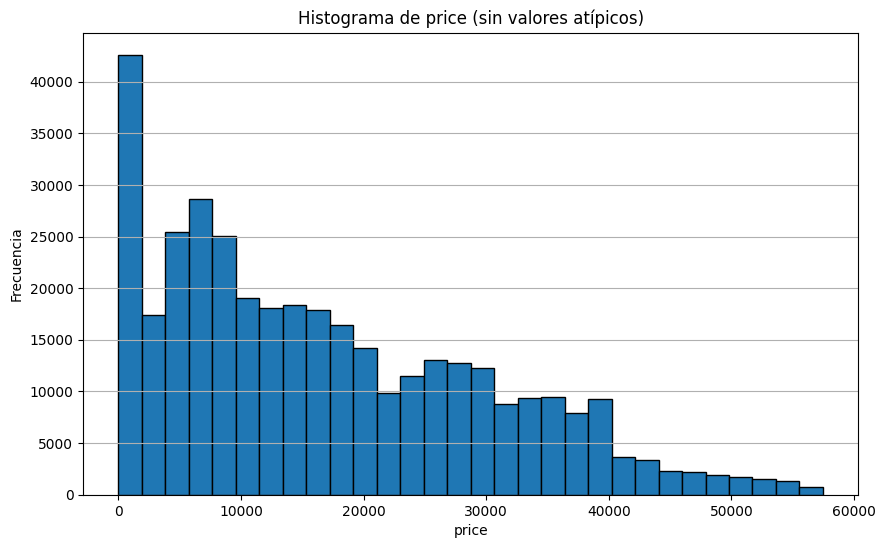

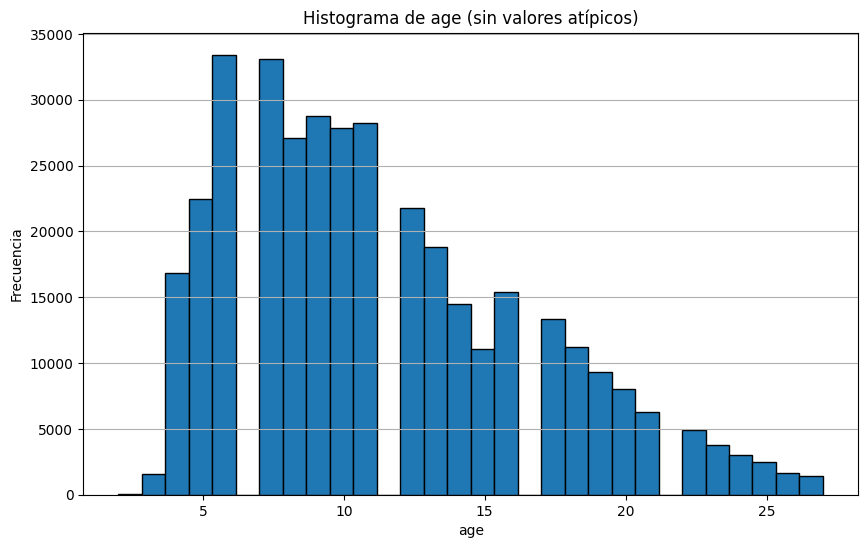

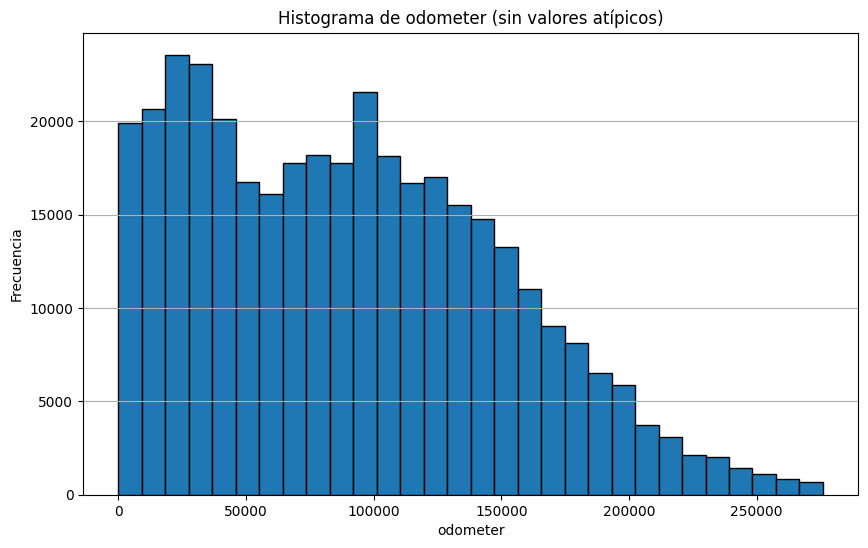

In [35]:
# Generar histogramas para observar el sesgo después de eliminar valores atípicos
variables = ['price', 'age', 'odometer']

for variable in variables:
    plt.figure(figsize=(10, 6))
    cars_df[variable].plot(kind='hist', bins=30, edgecolor='k')
    plt.title(f'Histograma de {variable} (sin valores atípicos)')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [36]:
# Plot histogram and Q-Q plots to explore the variable distribution

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.grid(axis='x')

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

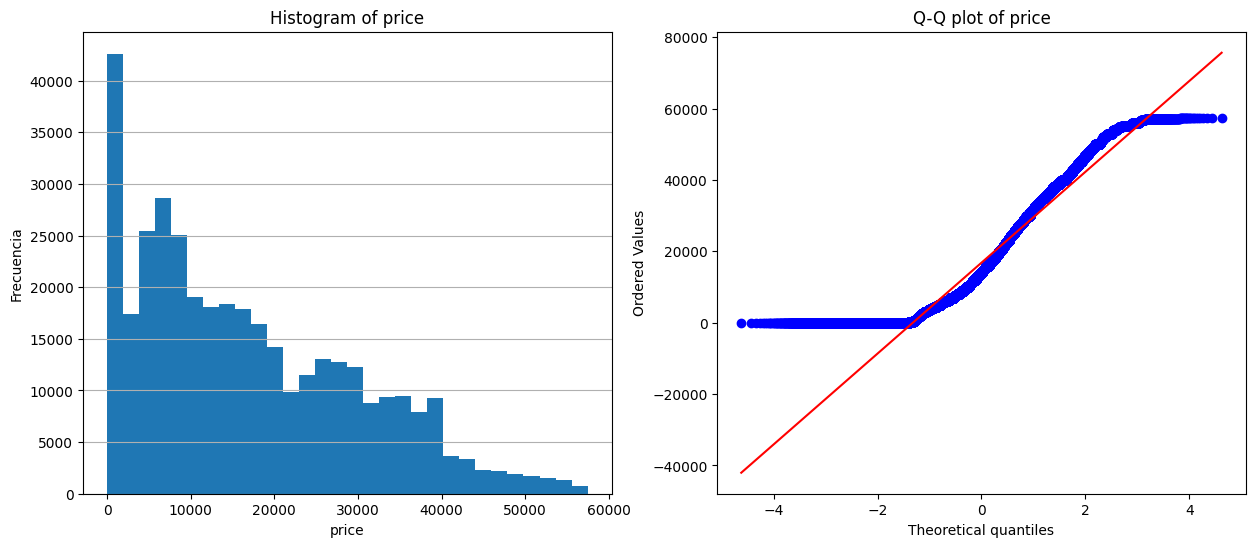

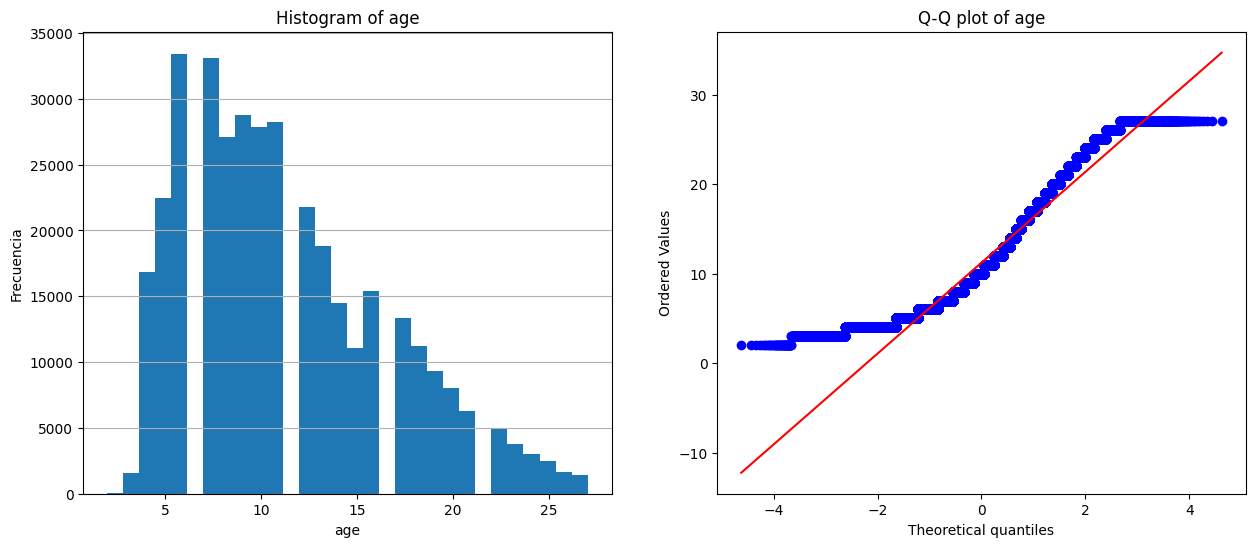

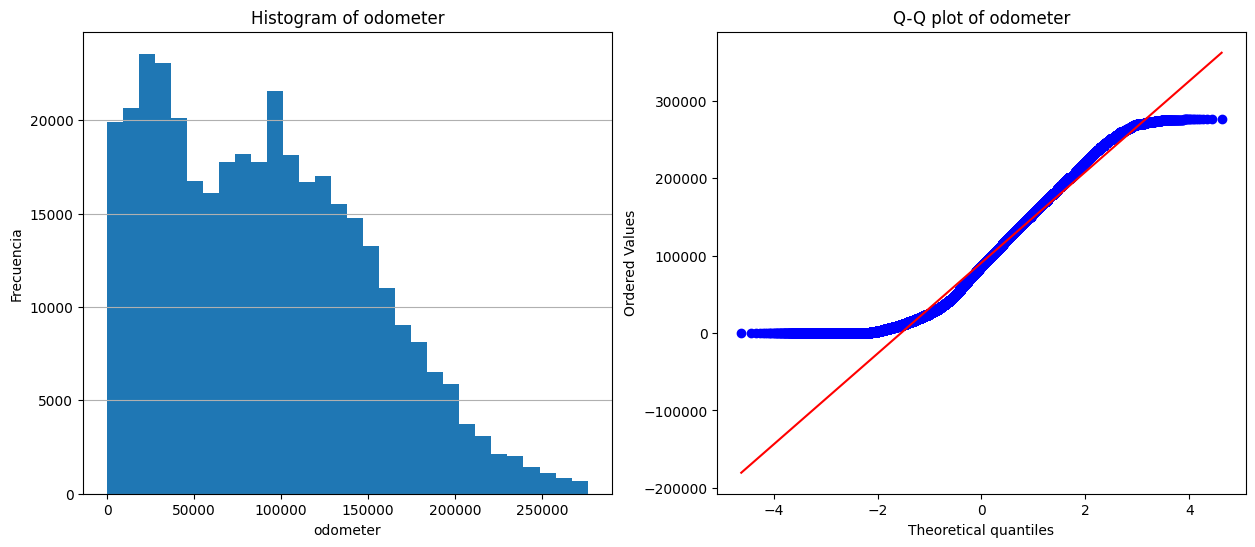

In [37]:
for var_ in ["price", "age", "odometer"]:
    diagnostic_plots(cars_df, var_)

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [38]:
from sklearn.preprocessing import PowerTransformer

In [39]:
# Instanciamos el transformador
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
# Ajustamos el transformador
transformer.fit(cars_df[["price", "age", "odometer"]])

PowerTransformer(standardize=False)

In [40]:
# Transformamos las variables
transf_df = pd.DataFrame(transformer.transform(cars_df[["price", "age", "odometer"]]), columns=["price", "age", "odometer"])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

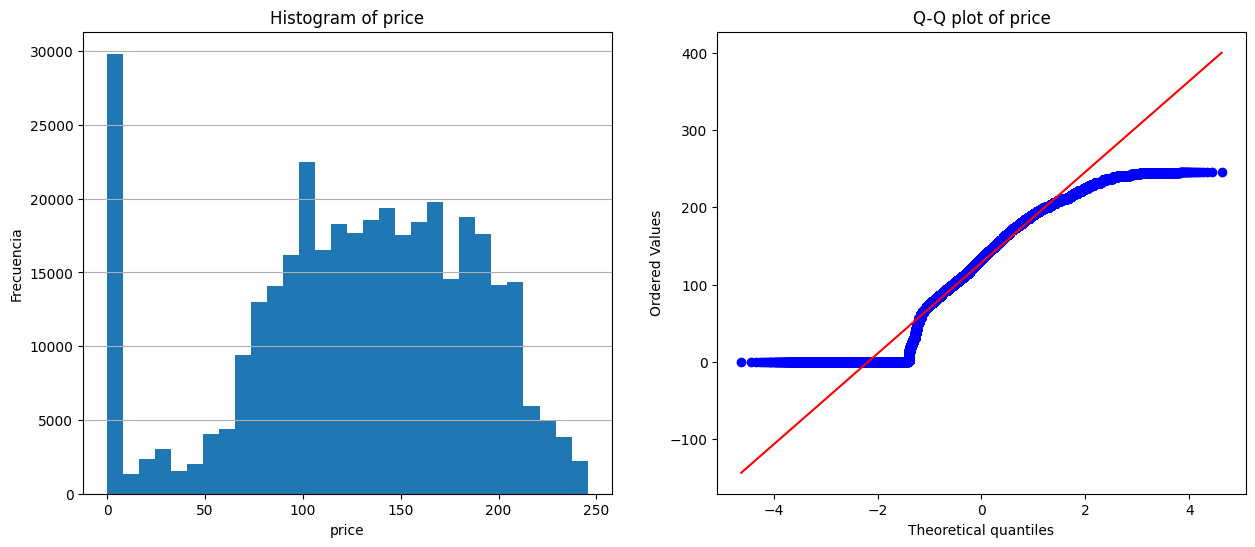

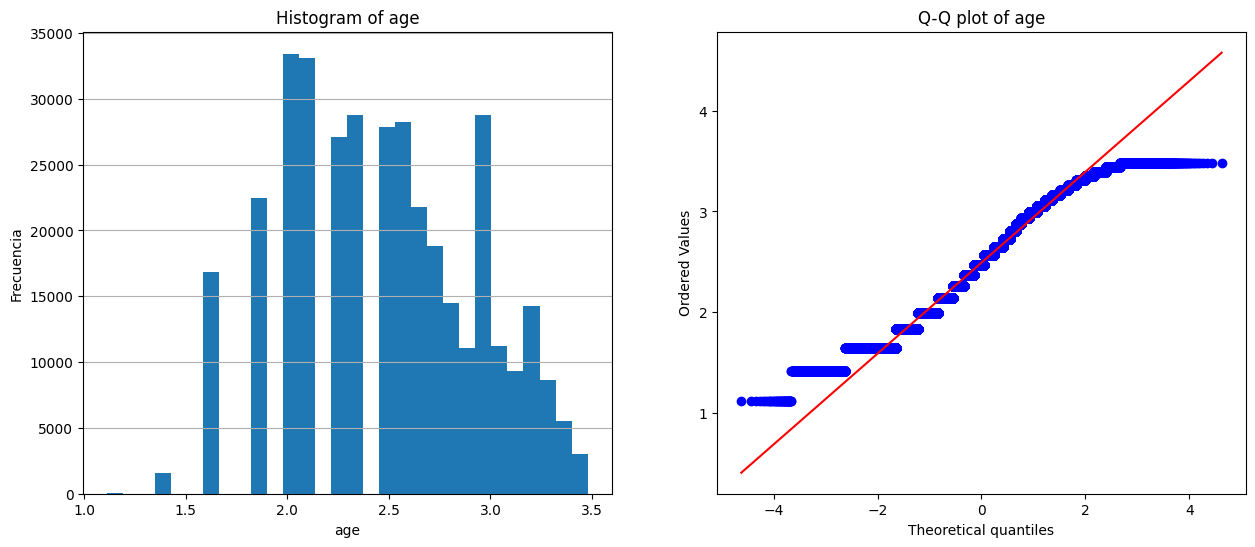

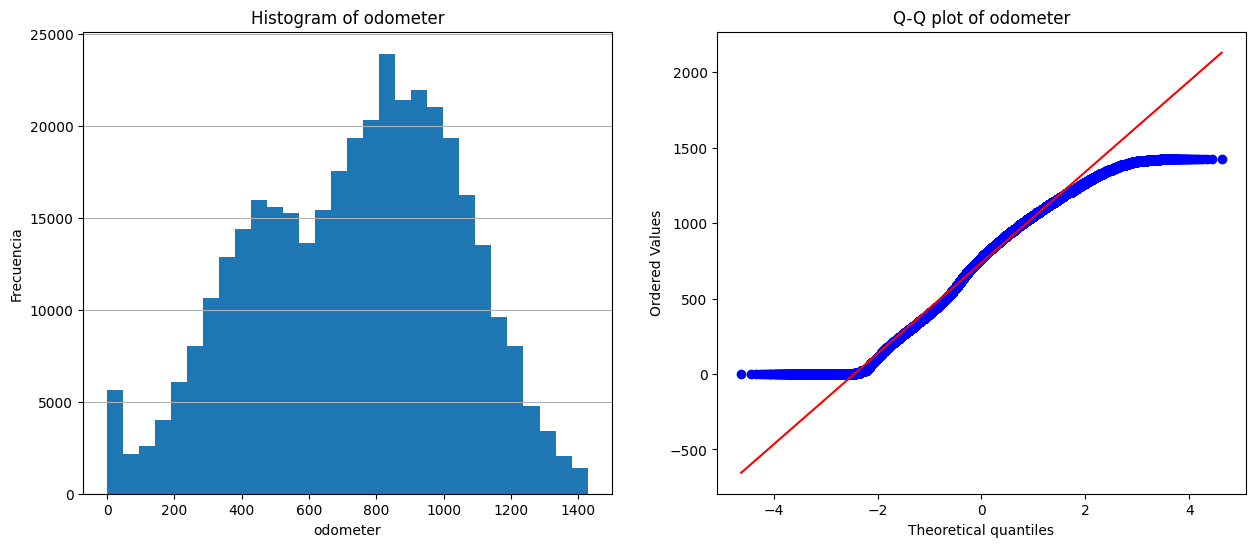

In [41]:
for var_ in ["price", "age", "odometer"]:
    diagnostic_plots(transf_df, var_)

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(transf_df)

MinMaxScaler()

In [44]:
# Transformamos las variables
minmax_df = pd.DataFrame(minmax_scaler.transform(transf_df), columns=["price", "age", "odometer"])

In [45]:
minmax_df

,price,age,odometer
0,0.794060,0.574773,0.437060
1,0.669384,0.714813,0.487739
2,0.852192,0.223713,0.242839
3,0.767013,0.432133,0.364403
4,0.560956,0.613949,0.665534
...,...,...,...
366323,0.681997,0.304266,0.320145
366324,0.762738,0.223713,0.189543
366325,0.808127,0.223713,0.107714
366326,0.745306,0.372666,0.308810


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

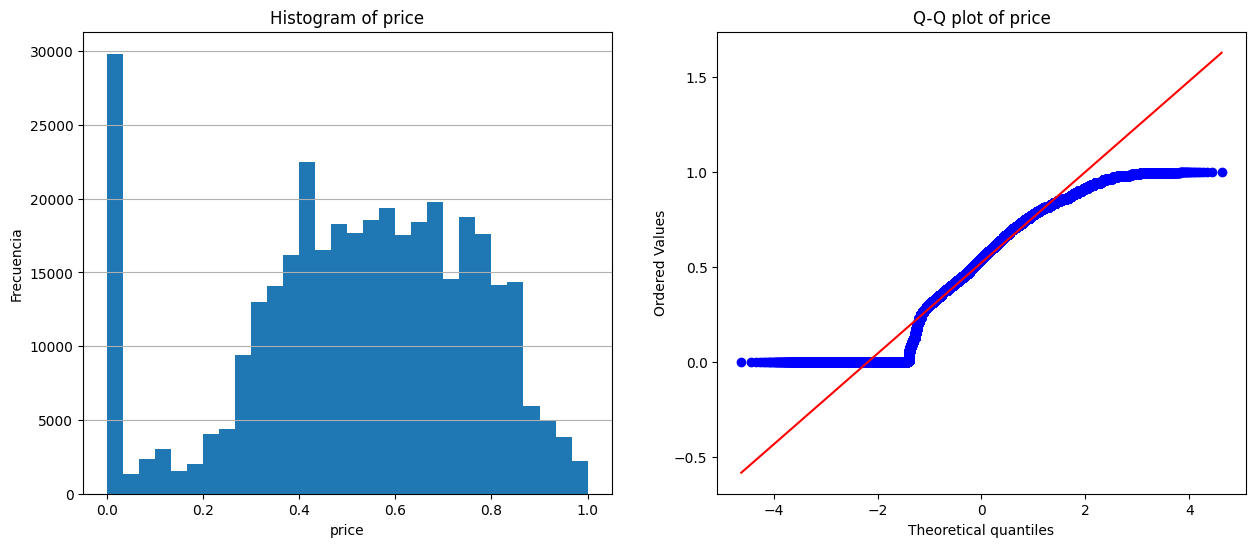

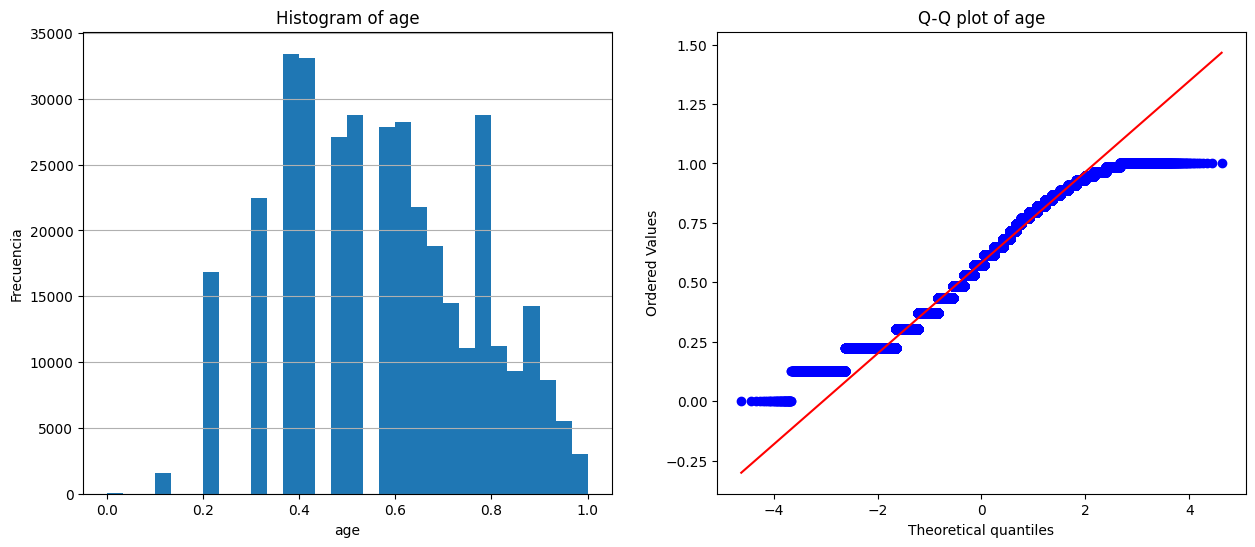

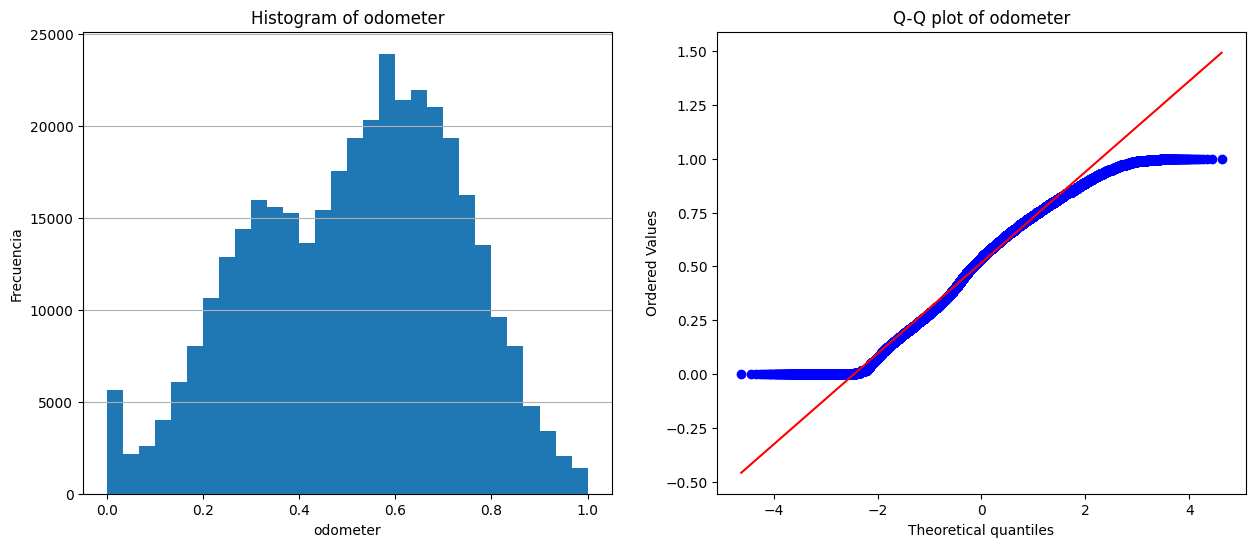

In [46]:
for var_ in ["price", "age", "odometer"]:
    diagnostic_plots(minmax_df, var_)

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [47]:
cat_vars_stats_df = cars_df[[x for x in cars_df.columns if x not in ["price", "age", "odometer"]]].describe().T
cat_vars_stats_df

,count,unique,top,freq
region,366328,404,columbus,3188
region_url,366328,413,https://grandrapids.craigslist.org,2737
manufacturer,366328,40,ford,61660
model,366328,19097,f-150,7436
fuel,366328,5,gas,312085
title_status,366328,6,clean,354717
transmission,366328,3,automatic,291628
type,366328,13,sedan,154259
state,366328,51,ca,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [48]:
highly_cardinal_variables = list(cat_vars_stats_df[cat_vars_stats_df["unique"] >= 100].index)
highly_cardinal_variables

['region', 'region_url', 'model']

In [49]:
few_cardinal_variables = list(cat_vars_stats_df[cat_vars_stats_df["unique"] < 100].index)
few_cardinal_variables

['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

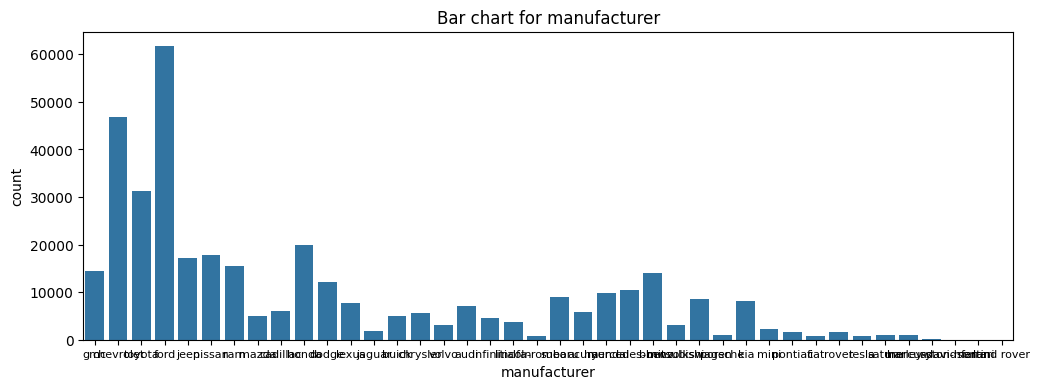

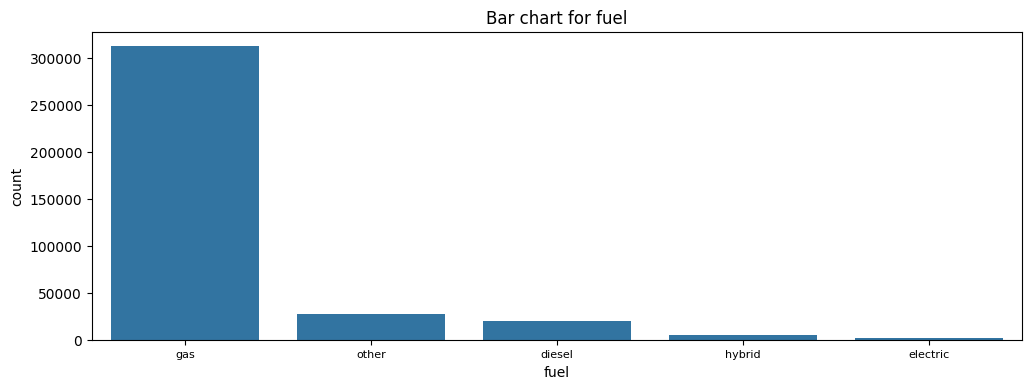

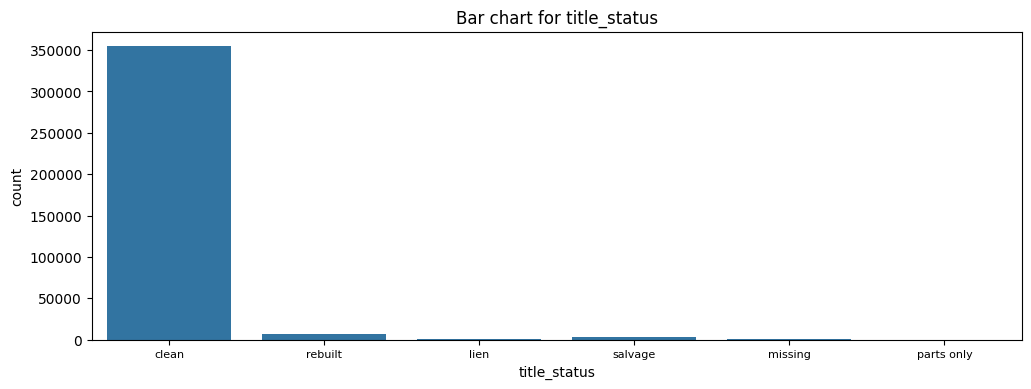

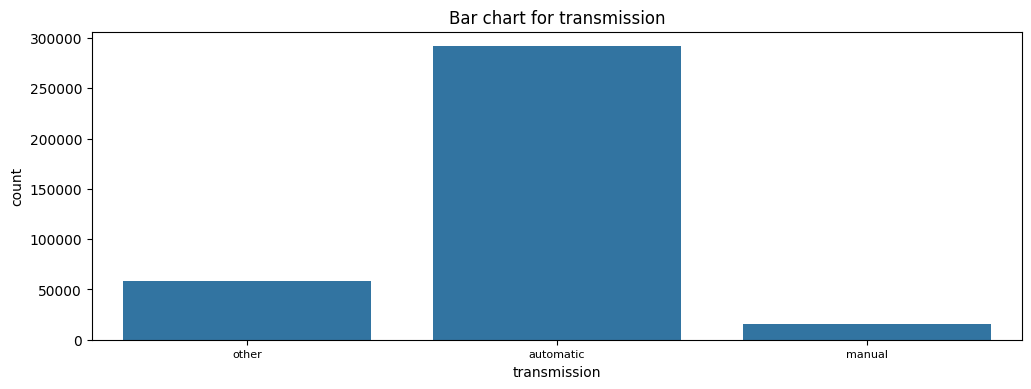

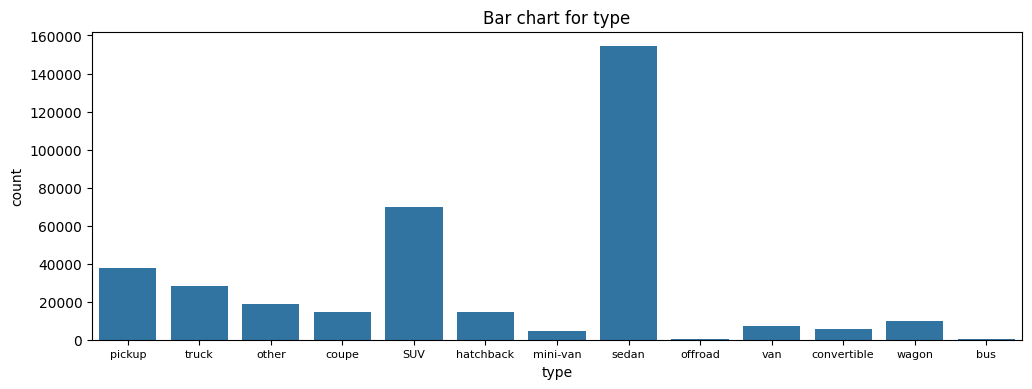

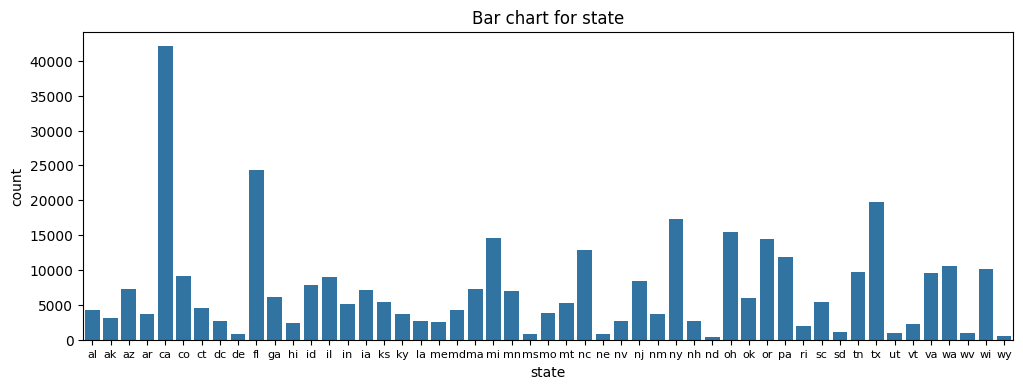

In [50]:
for cat_var in few_cardinal_variables:
    plt.figure(figsize=(12, 4))
    ax = sns.countplot(data=cars_df, x=cat_var)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_title(f"Bar chart for {cat_var}")

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [51]:
cars_df[few_cardinal_variables].describe()

,manufacturer,fuel,title_status,transmission,type,state
count,366328,366328,366328,366328,366328,366328
unique,40,5,6,3,13,51
top,ford,gas,clean,automatic,sedan,ca
freq,61660,312085,354717,291628,154259,42062


In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
# Instanciamos el encoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, )

In [54]:
# Ajustamos y transformamos los datos
onehot_df = pd.DataFrame(onehot_encoder.fit_transform(cars_df[few_cardinal_variables] ))
onehot_df

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [55]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

In [56]:
# Instanciamos el encoder
encoder = BinaryEncoder()

In [57]:
# transform data
binary_df = encoder.fit_transform(cars_df[highly_cardinal_variables])

In [58]:
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
366324,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
366325,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
366326,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [59]:
# minmax_df join onehot_df
final_df = minmax_df.join(onehot_df)
# minmax_df and onehot_df join binary_df
final_df = final_df.join(binary_df)

In [60]:
final_df

,price,age,odometer,0,1,2,3,4,5,6,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.574773,0.437060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.714813,0.487739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.223713,0.242839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.432133,0.364403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.613949,0.665534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.304266,0.320145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.223713,0.189543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.223713,0.107714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.372666,0.308810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1
